In [37]:
#https://yulab-smu.top/treedata-book/chapter6.html 
require('ggplot2')# || install.packages('ggplot2', dependencies = TRUE)
require('BiocManager')# || install.packages('BiocManager', dependencies = TRUE)
require('ggtree')# || BiocManager::install('ggtree')
require('ggtreeExtra')# || BiocManager::install('ggtreeExtra')
require('treeio')
require('tidytree')
require('dplyr')
require('ggstar')
require('TDbook')
require('stringr')
require('plotly')
options(repr.plot.width=20, repr.plot.height=20)

In [38]:
listcolor <- c('#FF0029','#377EB8','#66A61E','#984EA3','#00D2D5','#FF7F00','#AF8D00','#7F80CD','#B3E900','#C42E60','#A65628',
               '#F781BF','#8DD3C7','#BEBADA','#FB8072','#80B1D3','#FDB462','#FCCDE5','#99A893','#EED5D2','#3F00FF','#DABF86')
name <- 'influenza_segment_4'

In [42]:
data <- read.csv(paste0('centroids_', name, '.csv'), header = TRUE, sep = ',')
data$H <- factor(data$H, levels=str_sort(levels(as.factor(data$H)), numeric = TRUE))

In [43]:
tree <- read.tree(paste0('centroids_', name, '.fasta.tree'))

In [6]:
cls <- split(data$accession, data$H)
treegroup <- groupOTU(tree, cls) 

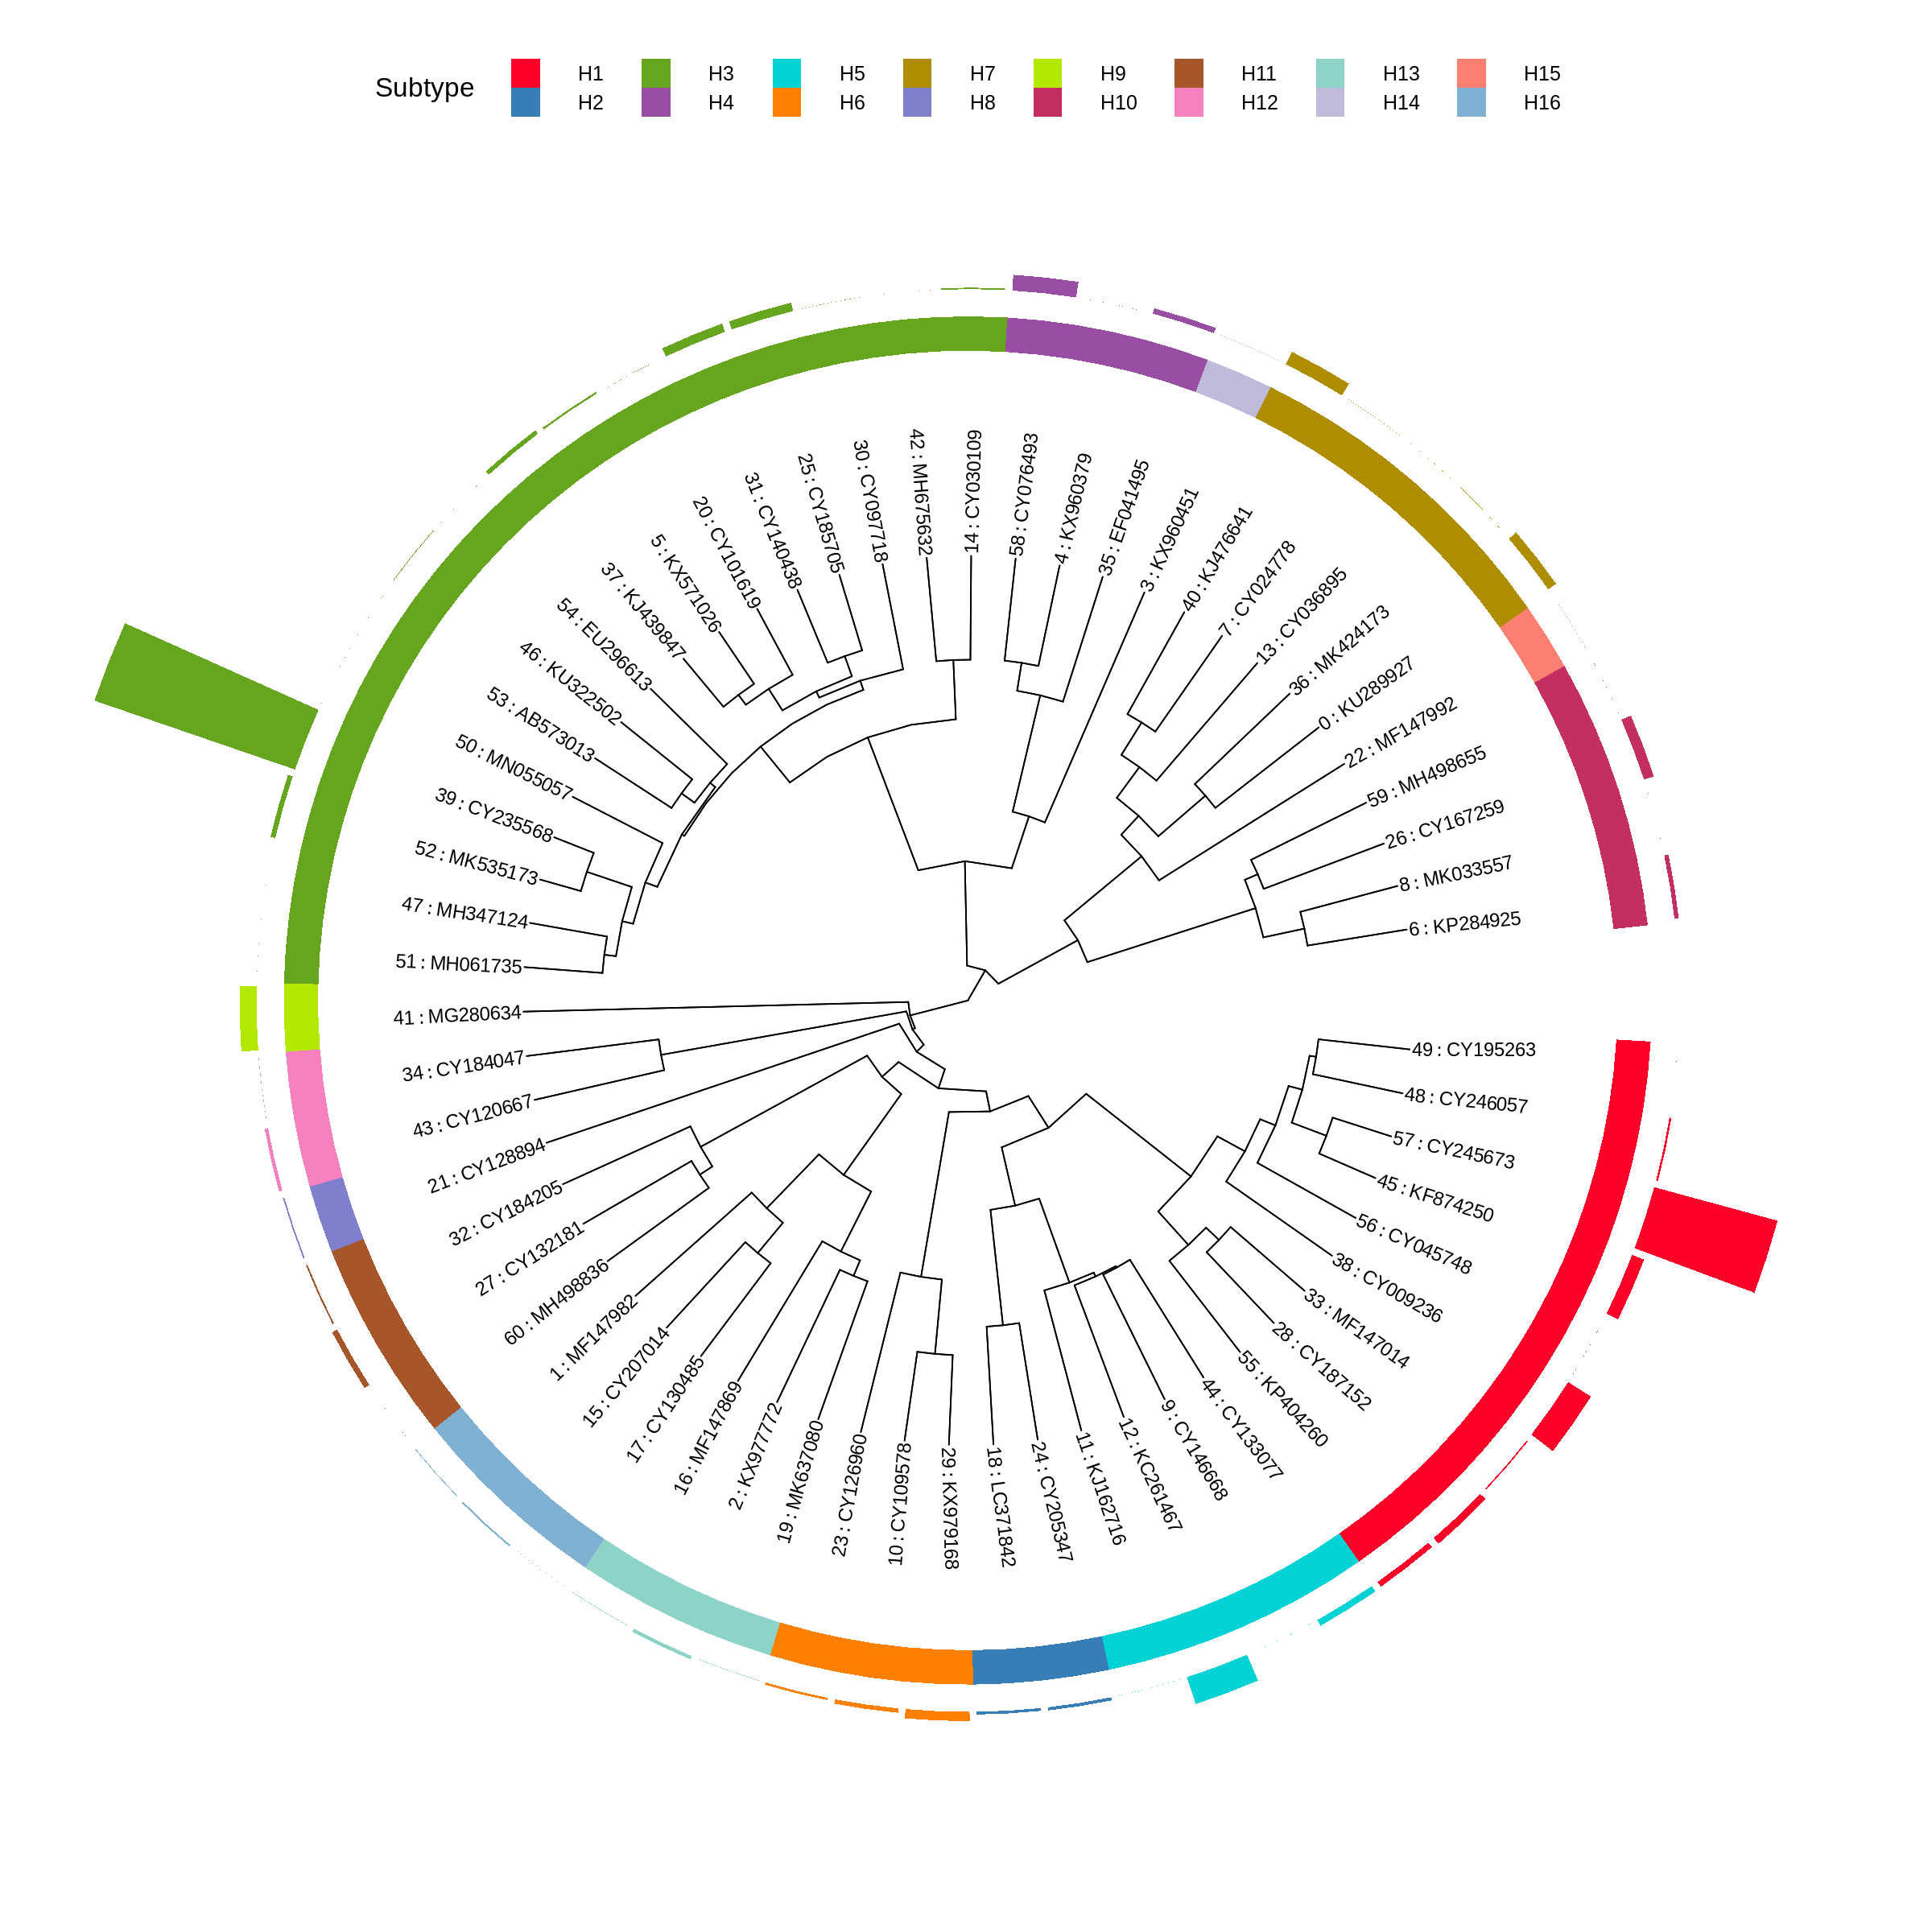

In [34]:
p <- ggtree(treegroup, layout='circular')
p <- p %<+% data
p1 <- p + geom_tree() +  
    #xlim(-1, 1) +
    geom_tiplab(aes(label=paste0(cluster, ':', label)), parse=T, size = 5, align=TRUE) +
    #geom_tiplab(size = 5, align=TRUE, linesize=.25) + 
    #geom_text(aes(label=label)) + 
    geom_fruit(
         geom=geom_tile,
         mapping=aes(fill=H),
         width=0.05,
         offset=0.5
    ) +
    geom_fruit(
        geom=geom_bar,
        mapping=aes(
            y=label, 
            x=size, 
            fill=H
        ),
        pwidth=0.5, 
        orientation="y", 
        stat="identity",
        offset=0.1,
    ) + 
    scale_fill_manual(
         name="Subtype",
         values=listcolor,
         guide=guide_legend(
            keywidth=1.5,
            keyheight=1.5,
            order=3,
            nrow=2
         ),
         na.translate=FALSE
    ) + 
    theme(
        legend.title=element_text(size=20), 
        legend.text=element_text(size=15),
        legend.position = 'top', 
        legend.spacing.x = unit(1, 'cm'),
        legend.margin = margin(t = 0, l = 0, b = -7.5, r = 0, unit='cm'),
#        legend.key.height=unit(3,"line"),
#        legend.key.width=unit(3,"line")
        plot.margin = margin(t = 0, l = -5, b = -7.5, r = -5, unit='cm')
    )
plot(p1)
ggsave(paste0('centroids_', name, '.pdf'), width = 50, height = 50, units = "cm", limitsize = FALSE)

In [ ]:
plot_ly(x=temp, y=pressure, z=dtime, type="scatter3d", mode="markers", color=temp)